
# **Zoo data**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [2]:
from google.colab import files


uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [3]:
data = pd.read_csv('Zoo.csv')

# Data Exploration

In [4]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
data.shape

(101, 18)

In [6]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
data.duplicated().sum()

0

# **Data Visualization**

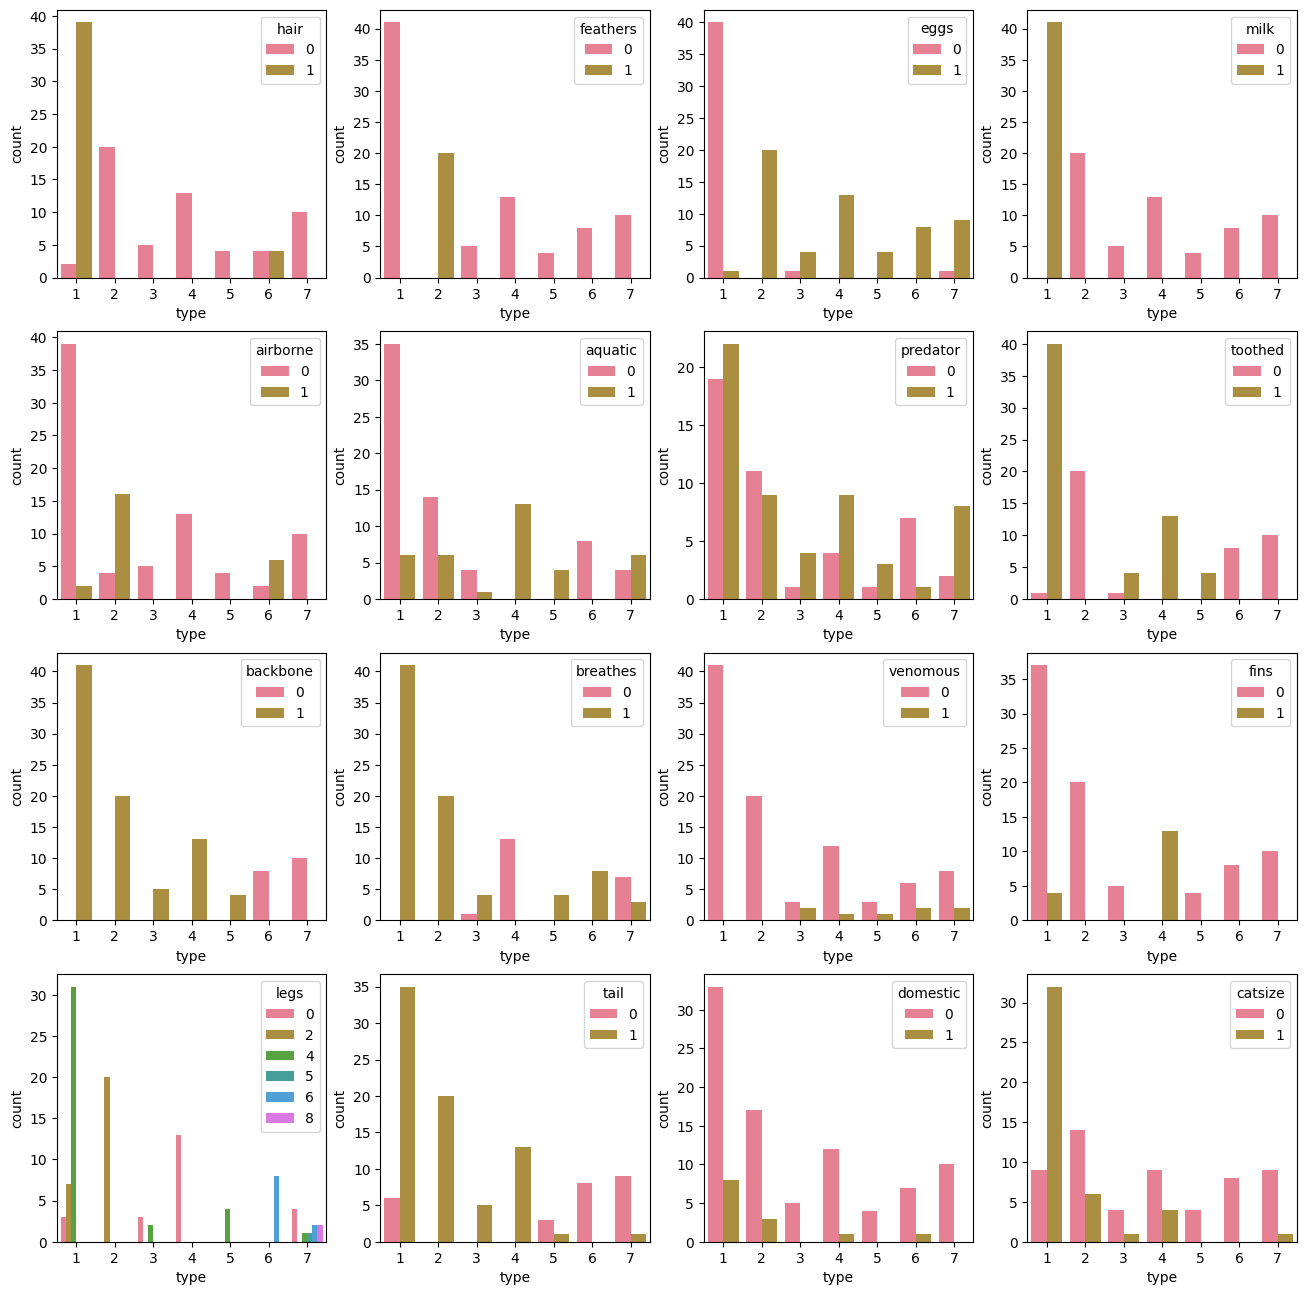

In [8]:
columns = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']
figs, axes = plt.subplots(nrows=4,ncols=4,figsize=(16,16))
for i in range(len(columns)):
    sns.countplot(data=data, hue=columns[i],x='type', ax=axes[i//4,i%4])

<Axes: >

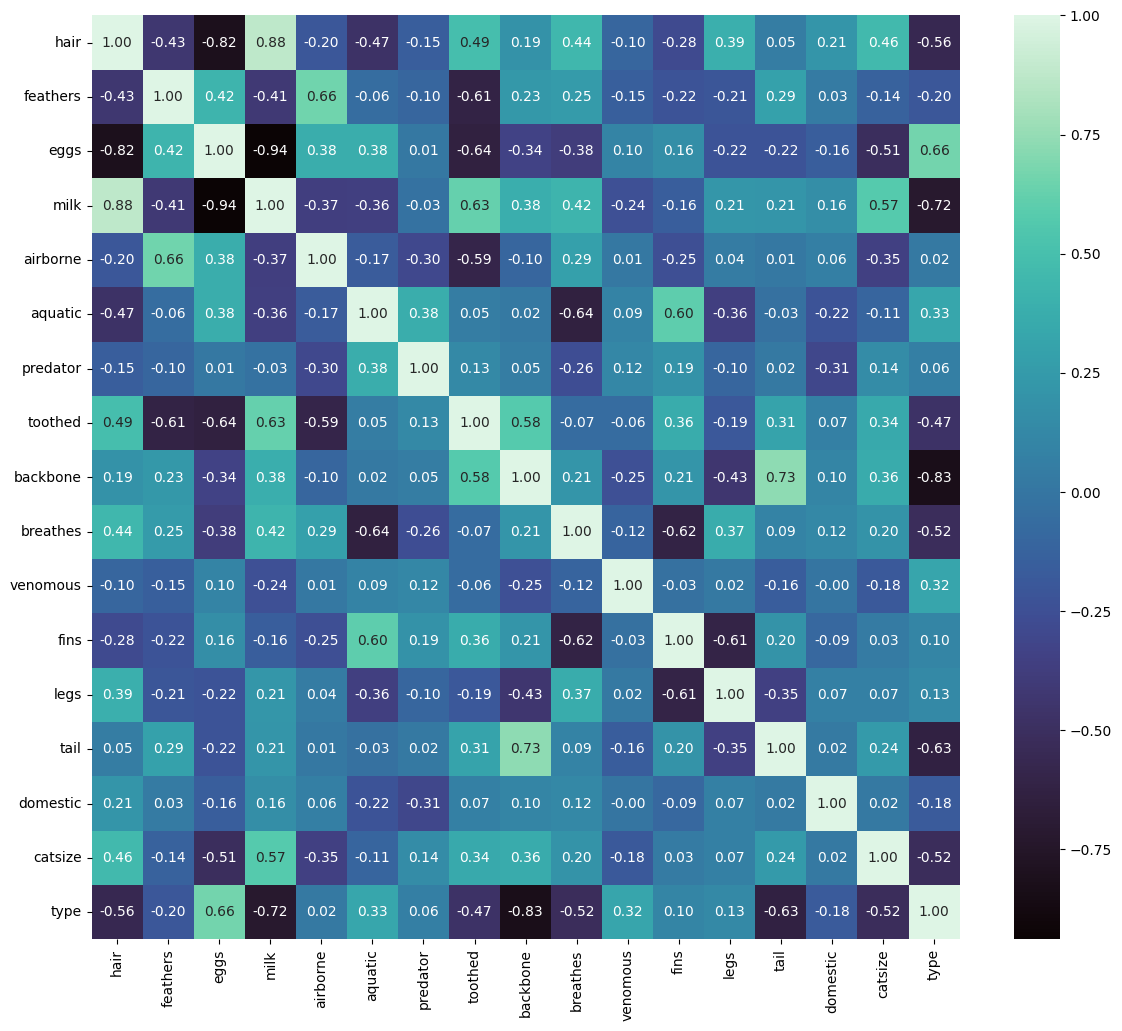

In [9]:
plt.figure(figsize=(14,12))
sns.heatmap(data=data.iloc[:,1:].corr(),annot=True,fmt='.2f',cmap='mako')

## **Preparing data for model**

In [10]:
x = data.drop(['type','animal name'],axis=1)
y = data['type']

In [11]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

# Parameter tuning

Parameters in sklearn KNeighborsClassifier

**n_neighbors**

   . default value is 5

   . Number of neighbors to use by default for kneighbors queries.

   . For our analysis we will check range of 1 to 20
   **weights**
- default value is 'uniform'
- Weight function used in prediction.
- Possible values:
- 'uniform': uniform weights. All points in each neighborhood are weighted equally.
    - 'distance': weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    - [callable]: user define function which accepts an array of distances, and returns an array of the same shape containing the weights.
- For our analysis we will check ['uniform','distance']

**algorithm**
- default value is 'auto'
- Algorithm used to compute the nearest neighbors
- Possible values:
    - 'ball_tree' will use BallTree: It partitions data into a series of nested bounding spheres
    - 'kd_tree' will use KDTree: It partitions the feature space so we can rule out whole partitions that are further away than our closest k neighbors.
    - 'brute' will use a brute-force search.
    - 'auto' will attempt to decide the most appropriate algorithm based on the values passed to fit method
- For our analysis we will check ['auto','ball_tree','kd_tree','brute']

**leaf_size**
- default value is 30
- Leaf size passed to BallTree or KDTree.
- This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.
- For our analysis we will check for [20,30,40]
**p**
- default value is 2
- Power parameter for the Minkowski metric.
- Possible values:
    - p = 1 is equivalent to using manhattan_distance (l1)
    - p=2 is euclidean_distance (l2)
    - For arbitrary p, minkowski_distance (l_p) is used
- For our analysis we will consider [1,2]
**metric**
- default value is 'minkowski'
- Metric to use for distance computation.
- Possible values:
    - 'manhattan': when power of minkowski distance is 1 (l1)
    - 'euclidean': when power of minkowski distance is 2 (l2)
    - 'chebyshev': when power of minkowski distance is infinity (l_inf)
    - 'minkowski': for arbitrary power of mikowski distance (l_p)
- For our analysis we will consider them all ['euclidean','manhattan','chebyshev','minkowski']

In [13]:
param_grid = {'n_neighbors':range(1,20),
              'weights':['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [20, 30, 40],
              'p': [1, 2],
              'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

In [14]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=4)
grid.fit(x,y)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': range(1, 20), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [15]:
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best parameters:  {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best score:  0.9503846153846154


Our best parameters are mostly default values,
Note leaf_size and p are useless cause algorithm is auto and we are defining metric anyways.
Only parameters need a specific mention are {'metric':'manhattan','n_neighbors':5}



Just to check trend of n_neighbors with different values, we will make a quick plot

Text(0, 0.5, 'Cross-Validated Accuracy')

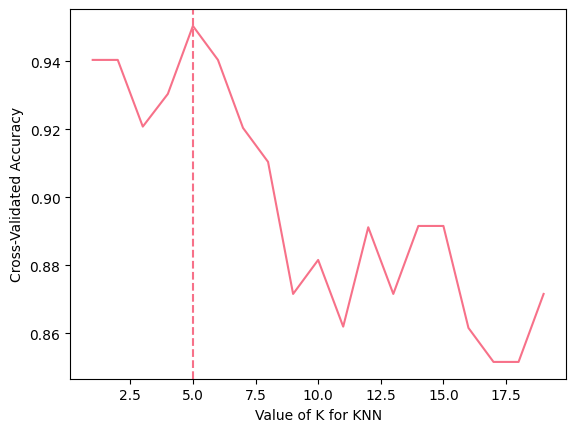

In [16]:
k_scores = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    scores = cross_val_score(knn, x, y, cv=4)
    k_scores.append(scores.mean())

plt.plot(range(1,20), k_scores)
plt.axvline(x=5,linestyle='--')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Building model using best parameters

In [17]:
model = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
results = cross_val_score(model, x, y, cv=4)

In [18]:
results.mean()*100

95.03846153846153

We got average of 95% accuracy in cross validation score

Building model on split data to check accuracy on unseen data

In [19]:
model = KNeighborsClassifier(metric='manhattan',n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [20]:
y_pred = model.predict(x_test)

Accuracy

In [21]:
np.mean(y_pred==y_test)*100

100.0

Suprisingly we got 100% accuracy on unseen data